# Data Analysis: Outcome Variables

## Import Libraries

In [1]:
# Import Required Modules and Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import sys

import matplotlib.pyplot as plt 

In [2]:
cd

/root


## Load Data

In [3]:
# Upload the Final Data
final_data = pd.read_csv('Project/Cleaned/final_data_preprocessed.csv', na_values = ['..'])

## Outcome Variables
The categorical value, <categorical_conflict_instances>, is a binary variable with a value of 0 being no conflict events and 1 being at least one conflict event of any kind occurring. The continuous value, <continuous_conflict_instances>, is a continuous variable taking the value of the number of conflict events of any kind occurring.

In [4]:
# Generate Categorical and Continuous Outcome Variables
final_data['categorical_conflict_instances'] = 0
final_data.loc[final_data['conflict_instances_total'] !=0, 'categorical_conflict_instances'] = 1
final_data['continuous_conflict_instances'] = final_data['conflict_instances_total'] 
final_data_x = final_data.iloc[:,:-16]

final_data_y_categorical = pd.DataFrame(final_data.loc[:,'categorical_conflict_instances'])
final_data_y_continuous = pd.DataFrame(final_data.loc[:,'categorical_conflict_instances'])
final_data_y_categorical.rename(columns = {'categorical_conflict_instances':'y'}, inplace = True) 
final_data_y_continuous.rename(columns = {'categorical_conflict_instances':'y'}, inplace = True) 

## Explore Data

In [5]:
# Summary Statistics
final_data.describe()[['continuous_conflict_instances']]

,continuous_conflict_instances
count,4992.000000
mean,142.222356
std,1075.820689
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,31334.000000


In [6]:
# Log Price
final_data["continuous_conflict_instances_log"] = final_data["continuous_conflict_instances"].map(lambda i: np.log(i) if i > 0 else 0) 

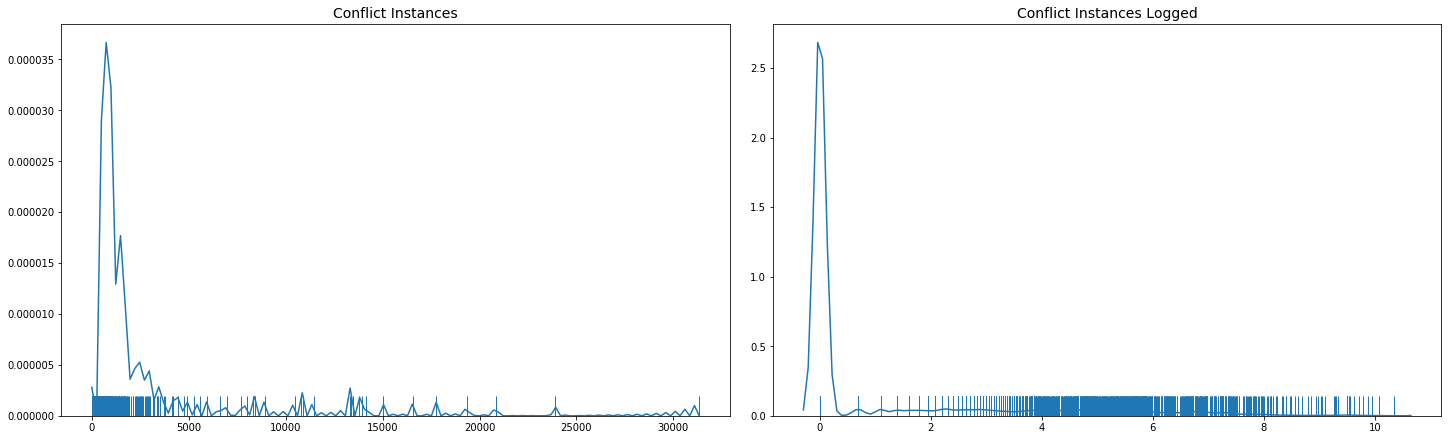

In [7]:
# Number of Conflict Instances vs Log Value of Number of Conflict Instances
fig4 = plt.figure(constrained_layout=True, figsize=(20,6))
spec4 = fig4.add_gridspec(ncols=2, nrows=1)

f4_ax1 = fig4.add_subplot(spec4[0, 0])
sns.distplot(final_data[['continuous_conflict_instances']], hist=False, rug=True)
plt.title('Conflict Instances', fontsize=14)

fig4.add_subplot(spec4[0, 1])
sns.distplot(final_data[['continuous_conflict_instances_log']], hist=False, rug=True)
plt.title('Conflict Instances Logged', fontsize=14)

plt.show()

In [8]:
final_data_y_continuous = pd.DataFrame(final_data.loc[:,'continuous_conflict_instances_log'])
final_data_y_continuous.rename(columns = {'continuous_conflict_instances_log':'y'}, inplace = True) 

In [9]:
# Shape of Data
print("Shape of Data (Final): ", final_data.shape)
print("Shape of Data (Features): ", final_data_x.shape)
print("Shape of Data (Outcome - Categorical): ", final_data_y_categorical.shape)
print("Shape of Data (Outcome - Continuous): ", final_data_y_continuous.shape)

Shape of Data (Final):  (4992, 733)
Shape of Data (Features):  (4992, 716)
Shape of Data (Outcome - Categorical):  (4992, 1)
Shape of Data (Outcome - Continuous):  (4992, 1)


## Save Pre-processed Data

In [10]:
# Save Data
final_data_x.to_csv('Project/Cleaned/final_data_x.csv')
final_data_y_categorical.to_csv('Project/Cleaned/final_data_y_categorical.csv')
final_data_y_continuous.to_csv('Project/Cleaned/final_data_y_continuous.csv')